In [ ]:
import os
import matplotlib.pyplot as plt
import pretty_midi


os.getcwd()

'c:\\Users\\Pichau\\Desktop\\leo\\Symbolic-Music-Genre-Transfer-with-CycleGAN-for-pytorch'

In [24]:
file_midi = 'test_JP_C_aux\jazz_piano_test_5_origin.mid'
midi_data = pretty_midi.PrettyMIDI(file_midi)

In [25]:
tempo = midi_data.get_tempo_changes()[1][0]  # BPM
ticks_per_beat = midi_data.resolution  # Pulsos por batida
seconds_per_beat = 60 / tempo
ticks_per_bar = ticks_per_beat * 4  # Para uma assinatura 4/4

# Extrair eventos de notas
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append({
            'pitch': note.pitch,
            'start': note.start,
            'end': note.end,
            'velocity': note.velocity
        })

In [26]:
compassos = []
current_bar = []
bar_duration = seconds_per_beat * 4  # Duração de um compasso em segundos
current_start = 0

for note in notes:
    # Se a nota está dentro do compasso atual
    if note['start'] < current_start + bar_duration:
        current_bar.append(note)
    else:
        # Salvar o compasso atual e iniciar um novo
        compassos.append(current_bar)
        current_bar = [note]
        current_start += bar_duration

# Adicionar o último compasso
if current_bar:
    compassos.append(current_bar)

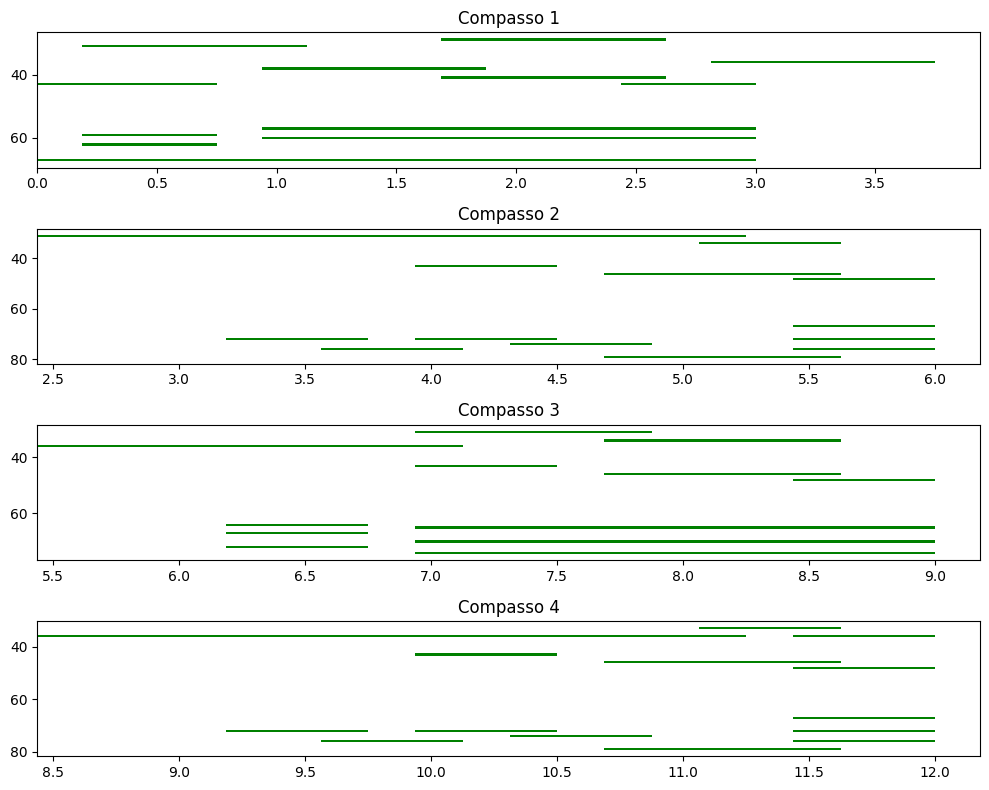

'reports\\compassos_jazz_piano_test_5_origin.png'

In [27]:
output_dir = "reports"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "compassos_jazz_piano_test_5_origin.png")

# Código para criação e salvamento da imagem
fig, axs = plt.subplots(len(compassos), 1, figsize=(10, len(compassos) * 2))

for idx, compasso in enumerate(compassos):
    pitches = [note['pitch'] for note in compasso]
    starts = [note['start'] for note in compasso]
    durations = [note['end'] - note['start'] for note in compasso]

    axs[idx].barh(pitches, durations, left=starts, color='green')
    axs[idx].set_title(f"Compasso {idx + 1}")
    axs[idx].invert_yaxis()  # Para o formato do piano

plt.tight_layout()
plt.savefig(output_path)
plt.show()

output_path

In [28]:
file_midi = 'test_JP_C_aux\jazz_piano_test_5_transfered.mid'
midi_data = pretty_midi.PrettyMIDI(file_midi)

In [29]:
tempo = midi_data.get_tempo_changes()[1][0]  # BPM
ticks_per_beat = midi_data.resolution  # Pulsos por batida
seconds_per_beat = 60 / tempo
ticks_per_bar = ticks_per_beat * 4  # Para uma assinatura 4/4

# Extrair eventos de notas
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append({
            'pitch': note.pitch,
            'start': note.start,
            'end': note.end,
            'velocity': note.velocity
        })

In [30]:
compassos = []
current_bar = []
bar_duration = seconds_per_beat * 4  # Duração de um compasso em segundos
current_start = 0

for note in notes:
    # Se a nota está dentro do compasso atual
    if note['start'] < current_start + bar_duration:
        current_bar.append(note)
    else:
        # Salvar o compasso atual e iniciar um novo
        compassos.append(current_bar)
        current_bar = [note]
        current_start += bar_duration

# Adicionar o último compasso
if current_bar:
    compassos.append(current_bar)

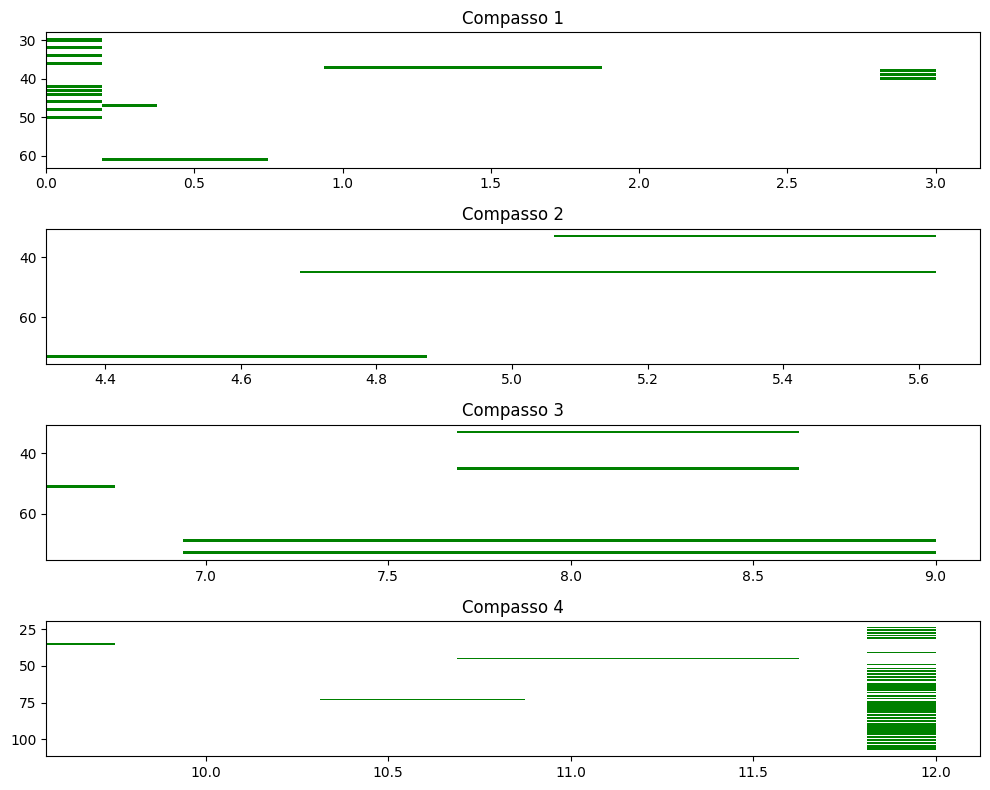

'reports\\compassos_jazz_piano_test_5_transfered.png'

In [31]:
output_dir = "reports"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "compassos_jazz_piano_test_5_transfered.png")

# Código para criação e salvamento da imagem
fig, axs = plt.subplots(len(compassos), 1, figsize=(10, len(compassos) * 2))

for idx, compasso in enumerate(compassos):
    pitches = [note['pitch'] for note in compasso]
    starts = [note['start'] for note in compasso]
    durations = [note['end'] - note['start'] for note in compasso]

    axs[idx].barh(pitches, durations, left=starts, color='green')
    axs[idx].set_title(f"Compasso {idx + 1}")
    axs[idx].invert_yaxis()  # Para o formato do piano

plt.tight_layout()
plt.savefig(output_path)
plt.show()

output_path